# ITD214 Applied Data Science Project
Lan Jieying / 9932458A

Content:
<br>
1. Data Loading & Merging of Files  
<br>
2. Data Understanding - Sunscreen category  
   a. Date/Time conversion and Feature Extraction  
   b. Data Cleaning  
   c. Filter 5 years data, Unique Product count & Correlation Analysis  
<br>
3. Text Analytics for merged_reviews  
   a. Tokenization  
   b. Create Frequency Distribution  
   c. Visualize Frequency Words using Word Cloud  
   d. Perform Text Preprocessing  
   e. Visualize the Cleaned Word List  
<br>
4. Text Representation  
   a. Generate Vector Space Model using TF-IDF  
   b. Singular Value Decomposition (SVD)  
   c. Train a Word2Vec  
<br>
5. Sentiment Analysis  
   a. Calculate the Sentiment Score Using VADER  
   b. Visualization - Distribution of Sentiment Scores  
<br>
6. Create is_best_seller column  
   a. Aggregate Data by unique product_id, predict if product is a best-seller or not  
<br>
7. Modeling  
   a. Train-Test Split  
   b. Model Training  
   c. Model Evaluation / Comparison - using Classification Report & Confusion Matrix  
   d. Various Visualizations - Confusion Matrix, Model Performance Comparison, ROC Curve, Distribution before/after applying SMOTE  
<br>
8. List of Best Seller Sunscreen Products


## 1. Data Loading & Merging of Files
- Load datasets.
- Merge files to create a consolidated dataset


In [4]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
# Load the product_info file into a Dataframe
product_info = pd.read_csv("product_info.csv")
print(product_info.head())

  product_id               product_name  brand_id brand_name  loves_count  \
0    P473671    Fragrance Discovery Set      6342      19-69         6320   
1    P473668    La Habana Eau de Parfum      6342      19-69         3827   
2    P473662  Rainbow Bar Eau de Parfum      6342      19-69         3253   
3    P473660       Kasbah Eau de Parfum      6342      19-69         3018   
4    P473658  Purple Haze Eau de Parfum      6342      19-69         2691   

   rating  reviews            size                      variation_type  \
0  3.6364     11.0             NaN                                 NaN   
1  4.1538     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
2  4.2500     16.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
3  4.4762     21.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
4  3.2308     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   

  variation_value  ... online_only out_of_stock  sephora_exclusive  \
0             NaN  ...

In [6]:
# Ensure consistent on data types
product_info['product_id'] = product_info['product_id'].astype(str).str.strip()
product_info.columns = product_info.columns.str.strip()
product_info.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [7]:
#product_info.info()

In [8]:
# Load the 5 review files into Dataframe
review_df1 = pd.read_csv('reviews_0-250.csv')
review_df2 = pd.read_csv('reviews_250-500.csv')
review_df3 = pd.read_csv('reviews_500-750.csv')
review_df4 = pd.read_csv('reviews_750-1250.csv')
review_df5 = pd.read_csv('reviews_1250-end.csv')

# Combine the 5 review files into Dataframe
combine_reviews = pd.concat([review_df1, review_df2, review_df3, review_df4, review_df5], ignore_index=True)
#print(combine_reviews.head())

C:\Users\Jieying\AppData\Local\Temp\ipykernel_15240\984758111.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review_df1 = pd.read_csv('reviews_0-250.csv')
C:\Users\Jieying\AppData\Local\Temp\ipykernel_15240\984758111.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review_df4 = pd.read_csv('reviews_750-1250.csv')
C:\Users\Jieying\AppData\Local\Temp\ipykernel_15240\984758111.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review_df5 = pd.read_csv('reviews_1250-end.csv')


In [9]:
# Ensure consistent on data types
product_info['product_id'] = product_info['product_id'].astype(str).str.strip()
combine_reviews['product_id'] = combine_reviews['product_id'].astype(str).str.strip()

In [10]:
# Merge the combine reviews DataFrames with the product DataFrame
merged_data_df = pd.merge(combine_reviews, product_info, on='product_id', how='left', suffixes=('_review', '_product'))
print(merged_data_df.head())

   Unnamed: 0    author_id  rating_review  is_recommended  helpfulness  \
0           0   1741593524              5             1.0          1.0   
1           1  31423088263              1             0.0          NaN   
2           2   5061282401              5             1.0          NaN   
3           3   6083038851              5             1.0          NaN   
4           4  47056667835              5             1.0          NaN   

   total_feedback_count  total_neg_feedback_count  total_pos_feedback_count  \
0                     2                         0                         2   
1                     0                         0                         0   
2                     0                         0                         0   
3                     0                         0                         0   
4                     0                         0                         0   

  submission_time                                        review_text  ...  \
0  

In [11]:
# Drop unwanted columns
columns_to_drop = ['Unnamed: 0', 'total_feedback_count', 'child_max_price', 'child_min_price', 'child_count', 'value_price_usd', 'sale_price_usd']

# Drop the specified columns from merged DataFrame - Final
merged_data_cleaned = merged_data_df.drop(columns=columns_to_drop, errors='ignore')

# Print column names of the merged DataFrame - Final
merged_data_cleaned.columns

Index(['author_id', 'rating_review', 'is_recommended', 'helpfulness',
       'total_neg_feedback_count', 'total_pos_feedback_count',
       'submission_time', 'review_text', 'review_title', 'skin_tone',
       'eye_color', 'skin_type', 'hair_color', 'product_id',
       'product_name_review', 'brand_name_review', 'price_usd_review',
       'product_name_product', 'brand_id', 'brand_name_product', 'loves_count',
       'rating_product', 'reviews', 'size', 'variation_type',
       'variation_value', 'variation_desc', 'ingredients', 'price_usd_product',
       'limited_edition', 'new', 'online_only', 'out_of_stock',
       'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category'],
      dtype='object')

## 2. Data Understanding - Sunscreen category

In [13]:
# Filter merged dataset to show all Sunscreen products
sunscreen_data = merged_data_cleaned[merged_data_df['secondary_category'] == 'Sunscreen']

# Merge review_text and review_title as merged_reviews
sunscreen_data['merged_reviews'] = sunscreen_data['review_title'].fillna('') + ' ' + sunscreen_data['review_text'].fillna('')

# Reset the index of the DataFrame 
sunscreen_data.reset_index(drop=True, inplace=True)

# Drop the original review_text and review_title columns - Final Sunscreen dataset
sunscreen_data = sunscreen_data.drop(columns=['review_text', 'review_title'])
print(sunscreen_data.head())

     author_id  rating_review  is_recommended  helpfulness  \
0  33332445596              2             0.0          NaN   
1  46245089323              5             1.0          0.5   
2   6355626005              5             1.0          NaN   
3  44805890184              4             1.0          1.0   
4  23521872577              5             1.0          NaN   

   total_neg_feedback_count  total_pos_feedback_count submission_time  \
0                         0                         0      2023-03-20   
1                         1                         1      2023-03-16   
2                         0                         0      2023-03-16   
3                         0                         2      2023-03-15   
4                         0                         0      2023-03-15   

     skin_tone eye_color    skin_type  ... limited_edition new online_only  \
0  lightMedium     brown         oily  ...               1   0           0   
1  lightMedium     brown  combin

C:\Users\Jieying\AppData\Local\Temp\ipykernel_15240\624340134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sunscreen_data['merged_reviews'] = sunscreen_data['review_title'].fillna('') + ' ' + sunscreen_data['review_text'].fillna('')


### a. Date/Time conversion and Feature Extraction
- Convert submission_time to datetime.
- Extract by year and month format.

In [15]:
# Convert submission_time to datetime format and extract year and month
sunscreen_data['submission_time'] = pd.to_datetime(sunscreen_data['submission_time'])
sunscreen_data['year'] = sunscreen_data['submission_time'].dt.year
sunscreen_data['month'] = sunscreen_data['submission_time'].dt.month

# Count the number of reviews by year and month
reviews_per_year_month = sunscreen_data.groupby(['year', 'month']).size().reset_index(name='count')

# Display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the DataFrame with all rows
#print("Number of Reviews Per Year and Month:\n", reviews_per_year_month)

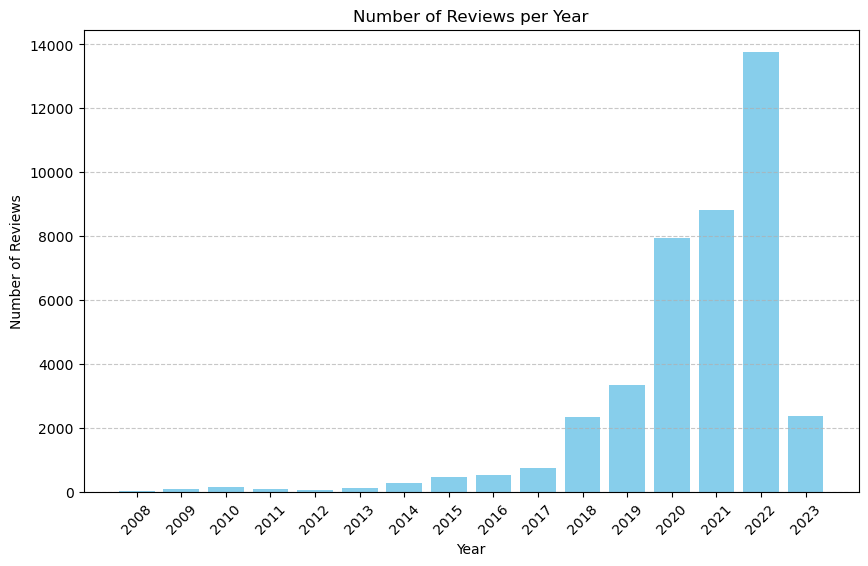

In [16]:
# Visual review counts by year
reviews_per_year = sunscreen_data.groupby('year').size().reset_index(name='count')

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(reviews_per_year['year'], reviews_per_year['count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Year')
plt.xticks(reviews_per_year['year'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### b. Data Cleaning
- Handle missing values, duplicates and inconsistencies.

In [18]:
# Count the number of missing values in each column
missing_values = sunscreen_data.isnull().sum()
missing_values

author_id                       0
rating_review                   0
is_recommended               2292
helpfulness                 19262
total_neg_feedback_count        0
total_pos_feedback_count        0
submission_time                 0
skin_tone                    3382
eye_color                    4007
skin_type                    1659
hair_color                   4630
product_id                      0
product_name_review             0
brand_name_review               0
price_usd_review                0
product_name_product            0
brand_id                        0
brand_name_product              0
loves_count                     0
rating_product                  0
reviews                         0
size                          854
variation_type               3173
variation_value              3925
variation_desc              36984
ingredients                   423
price_usd_product               0
limited_edition                 0
new                             0
online_only   

In [19]:
# Calculate the percentage of missing values for each column
missing_percentage = sunscreen_data.isnull().mean() * 100

# Display the percentage of missing values
print("Percentage of Missing Values in Each Column:")
print(missing_percentage)

Percentage of Missing Values in Each Column:
author_id                    0.000000
rating_review                0.000000
is_recommended               5.571356
helpfulness                 46.821751
total_neg_feedback_count     0.000000
total_pos_feedback_count     0.000000
submission_time              0.000000
skin_tone                    8.220910
eye_color                    9.740149
skin_type                    4.032670
hair_color                  11.254527
product_id                   0.000000
product_name_review          0.000000
brand_name_review            0.000000
price_usd_review             0.000000
product_name_product         0.000000
brand_id                     0.000000
brand_name_product           0.000000
loves_count                  0.000000
rating_product               0.000000
reviews                      0.000000
size                         2.075889
variation_type               7.712876
variation_value              9.540825
variation_desc              89.900095
ingre

In [20]:
# Drop columns with High Missing value percentage (50% & above)
columns_to_drop = ['variation_desc', 'helpfulness']
sunscreen_data = sunscreen_data.drop(columns=columns_to_drop, errors='ignore')

# Impute categorical columns with mode (7% to 12% missing values)
categorical_columns_to_impute = ['highlights', 'hair_color', 'eye_color', 'skin_tone', 'variation_type', 'variation_value']

for col in categorical_columns_to_impute:
    sunscreen_data[col] = sunscreen_data[col].fillna(sunscreen_data[col].mode()[0])

# Drop rows with missing values in columns with less than 5% missing data
columns_with_few_missing_values = ['is_recommended', 'skin_type', 'size', 'tertiary_category', 'ingredients']
sunscreen_data = sunscreen_data.dropna(subset=columns_with_few_missing_values)

#print(sunscreen_data.head())

In [21]:
# Verify percentage of missing values for each column after cleaning
missing_percentage = sunscreen_data.isnull().mean() * 100

# Display percentage of missing values
print("Percentage of Missing Values in Each Column:")
print(missing_percentage)

Percentage of Missing Values in Each Column:
author_id                   0.0
rating_review               0.0
is_recommended              0.0
total_neg_feedback_count    0.0
total_pos_feedback_count    0.0
submission_time             0.0
skin_tone                   0.0
eye_color                   0.0
skin_type                   0.0
hair_color                  0.0
product_id                  0.0
product_name_review         0.0
brand_name_review           0.0
price_usd_review            0.0
product_name_product        0.0
brand_id                    0.0
brand_name_product          0.0
loves_count                 0.0
rating_product              0.0
reviews                     0.0
size                        0.0
variation_type              0.0
variation_value             0.0
ingredients                 0.0
price_usd_product           0.0
limited_edition             0.0
new                         0.0
online_only                 0.0
out_of_stock                0.0
sephora_exclusive          

### c. Filter 5 years data, Unique Product count & Correlation Analysis
- Create correlation matrix for key variables (numerical).


In [23]:
# Filter 5 years data from January 2018 to March 2023 by year and month
start_year = 2018
end_year = 2023
end_month = 3

sunscreen_data_filtered = sunscreen_data[
    ((sunscreen_data['year'] > start_year) & (sunscreen_data['year'] < end_year)) |
    ((sunscreen_data['year'] == start_year) & (sunscreen_data['month'] >= 1)) |
    ((sunscreen_data['year'] == end_year) & (sunscreen_data['month'] <= end_month))
]

# Display the header of filtered DataFrame
print("Filtered DataFrame (First 5 Rows):\n", sunscreen_data_filtered.head())

# Display the shape of filtered DataFrame
#print("Filtered DataFrame Shape:\n", sunscreen_data_filtered.shape)


Filtered DataFrame (First 5 Rows):
      author_id  rating_review  is_recommended  total_neg_feedback_count  \
0  33332445596              2             0.0                         0   
1  46245089323              5             1.0                         1   
2   6355626005              5             1.0                         0   
3  44805890184              4             1.0                         0   
4  23521872577              5             1.0                         0   

   total_pos_feedback_count submission_time    skin_tone eye_color  \
0                         0      2023-03-20  lightMedium     brown   
1                         1      2023-03-16  lightMedium     brown   
2                         0      2023-03-16         fair     brown   
3                         2      2023-03-15        light     hazel   
4                         0      2023-03-15  lightMedium     brown   

     skin_type hair_color product_id            product_name_review  \
0         oily      b

In [24]:
# Check the number of unique product_id values
unique_product = sunscreen_data_filtered['product_id'].nunique()
unique_product

98

In [25]:
# Get baseline information on sunscreen_data_filtered
print ("Rows     : " , sunscreen_data_filtered.shape[0])
print ("Columns  : " , sunscreen_data_filtered.shape[1])
print ("\nFeatures : \n" , sunscreen_data_filtered.columns.tolist())
print ("\nMissing values :  " , sunscreen_data_filtered.isnull().sum().values.sum())
print ("\nUnique values :  \n" , sunscreen_data_filtered.nunique())


Rows     :  36102
Columns  :  37

Features : 
 ['author_id', 'rating_review', 'is_recommended', 'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time', 'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_id', 'product_name_review', 'brand_name_review', 'price_usd_review', 'product_name_product', 'brand_id', 'brand_name_product', 'loves_count', 'rating_product', 'reviews', 'size', 'variation_type', 'variation_value', 'ingredients', 'price_usd_product', 'limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category', 'secondary_category', 'tertiary_category', 'merged_reviews', 'year', 'month']

Missing values :   0

Unique values :  
 author_id                   31390
rating_review                   5
is_recommended                  2
total_neg_feedback_count       67
total_pos_feedback_count      135
submission_time              1882
skin_tone                      13
eye_color                       6
skin_type  

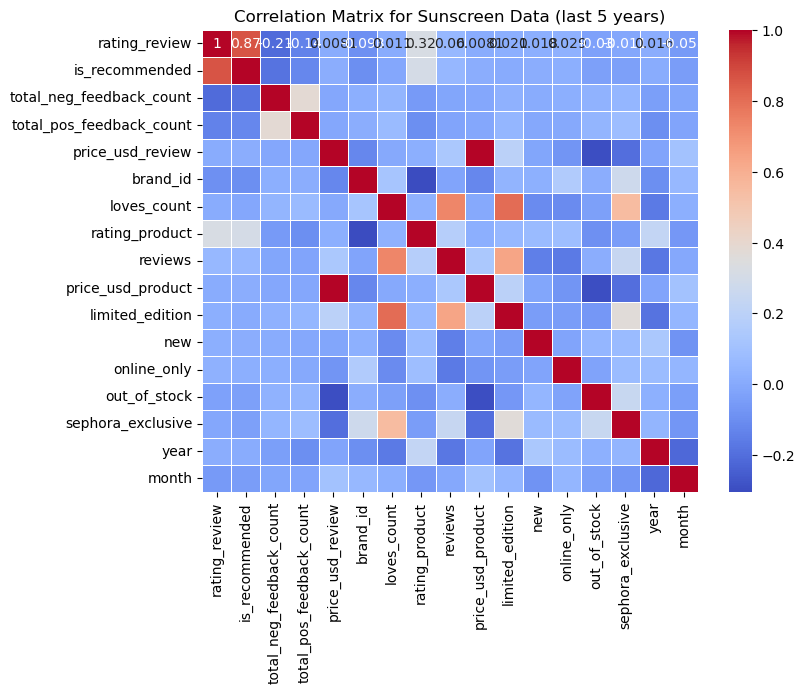

In [26]:
# Create correlation matrix - numeric columns only
numeric_columns = sunscreen_data_filtered.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Sunscreen Data (last 5 years)')
plt.show()

The correlation coefficient ranges from -1 (least) to 1 (most). 

- Highly Correlated: rating_review and is_recommended: Correlation coefficient = 0.85
- Least Correlated: total_pos_feedback_count and brand_id: Correlation coefficient = -0.05


In [28]:
# Check any outliers using Z-score for love_counts in sunscreen category
def identify_outliers_zscore(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = [(y - mean) / std for y in data]
    outliers = np.where(np.abs(z_scores) > threshold)
    return outliers

# Display result
outliers_zscore = identify_outliers_zscore(sunscreen_data_filtered['loves_count'])
print("Outliers detected using Z-score method:\n", sunscreen_data_filtered.iloc[outliers_zscore])


Outliers detected using Z-score method:
 Empty DataFrame
Columns: [author_id, rating_review, is_recommended, total_neg_feedback_count, total_pos_feedback_count, submission_time, skin_tone, eye_color, skin_type, hair_color, product_id, product_name_review, brand_name_review, price_usd_review, product_name_product, brand_id, brand_name_product, loves_count, rating_product, reviews, size, variation_type, variation_value, ingredients, price_usd_product, limited_edition, new, online_only, out_of_stock, sephora_exclusive, highlights, primary_category, secondary_category, tertiary_category, merged_reviews, year, month]
Index: []


In [29]:
# Calculate mean and median for loves_count
mean_loves_count = sunscreen_data['loves_count'].mean()
median_loves_count = sunscreen_data['loves_count'].median()

# Display the results
print(f"Mean of loves_count for sunscreen category: {mean_loves_count}")
print(f"Median of loves_count for sunscreen category: {median_loves_count}")

Mean of loves_count for sunscreen category: 72517.24270721427
Median of loves_count for sunscreen category: 41804.0


## 3. Text Analytics for merged_reviews

In [31]:
from wordcloud import WordCloud
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jieying\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jieying\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jieying\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
# Select the specific columns
selected_columns = sunscreen_data_filtered[['product_id', 'brand_name_review', 'merged_reviews', 'loves_count', 'limited_edition']]
selected_columns.head()

product_id brand_name_review  \
0    P454380        Supergoop!   
1    P454380        Supergoop!   
2    P454380        Supergoop!   
3    P454380        Supergoop!   
4    P454380        Supergoop!   

                                      merged_reviews  loves_count  \
0  Not a fan This sunscreen was really weird on m...       302951   
1   My most repurchased sunscreen. This just leav...       302951   
2  DAILY MUST-HAVE This is my go-to sunscreen. I ...       302951   
3   this sunscreen is really good i would give it...       302951   
4  Non sticky or white cast/peel off I love this ...       302951   

   limited_edition  
0                1  
1                1  
2                1  
3                1  
4                1

### a. Tokenization
Tokenizer text data into words.

In [34]:
# Enter codes here - break into single words
tokenized_words = word_tokenize(selected_columns.merged_reviews[1])
print(tokenized_words)
print('number of words:' + str(len(tokenized_words)))

['My', 'most', 'repurchased', 'sunscreen', '.', 'This', 'just', 'leave', 'me', 'feeling', 'so', 'soft', 'and', 'smooth', '.', 'The', 'silicone', 'just', 'form', 'a', 'protective', 'film', 'and', 'it', 'diffused', 'the', 'looks', 'of', 'scarring', 'on', 'my', 'face', '.', 'I', 'love', 'to', 'used', 'this', 'whenever', 'I', '’', 'm', 'doing', 'makeup', 'as', 'I', 'can', 'use', 'this', 'as', 'a', 'primer', '.', 'Highly', 'recommend', '!', '!']
number of words:57


In [35]:
# Change to lower caser. Loop through all reviews and tokenize into words
all_words = [word.lower() for sent in selected_columns['merged_reviews'] for word in word_tokenize(sent)]

#print the first 10 words
print(all_words[:10])

['not', 'a', 'fan', 'this', 'sunscreen', 'was', 'really', 'weird', 'on', 'my']


In [36]:
# Long execute time
tokenized_reviews = [word_tokenize(review) for review in selected_columns['merged_reviews']]

# Print first few tokenized review as a sample
print(tokenized_reviews[0])

['Not', 'a', 'fan', 'This', 'sunscreen', 'was', 'really', 'weird', 'on', 'my', 'skin', 'and', 'not', 'a', 'fan', 'of', 'the', 'texture', 'and', 'formula']


### b. Create Frequency Distribution
- Generate frequency distribution of tokens


In [38]:
from nltk.probability import FreqDist

#Loop through all reviews and tokenize into words
all_words = [word.lower() for sent in selected_columns['merged_reviews'] for word in word_tokenize(sent)]

# Count the frequency words appear in the entire list of words
all_words_frequency = FreqDist(all_words)
#print (all_words_frequency)

# print 10 most frequently occurring words
print ("\nTop 10 most frequently occurring words")
print (all_words_frequency.most_common(10))

# print 10 least frequently occurring words
print ("\nTop 10 least frequently occurring words")
print (all_words_frequency.most_common()[-10:])


Top 10 most frequently occurring words
[('.', 128197), ('i', 108727), ('it', 100609), ('and', 73451), ('the', 67462), ('’', 62871), ('a', 62139), (',', 60380), ('this', 59211), ('my', 49226)]

Top 10 least frequently occurring words
[('10.00', 1), ('75-100', 1), ('touched-up', 1), ('—see', 1), ('makeup/intentional', 1), ('non-shimmery', 1), ('would.overall', 1), ('minuets', 1), ('marigold', 1), ('reassurance', 1)]


### c. Visualize Frequency Words using Word Cloud
- Create word clouds for most common words


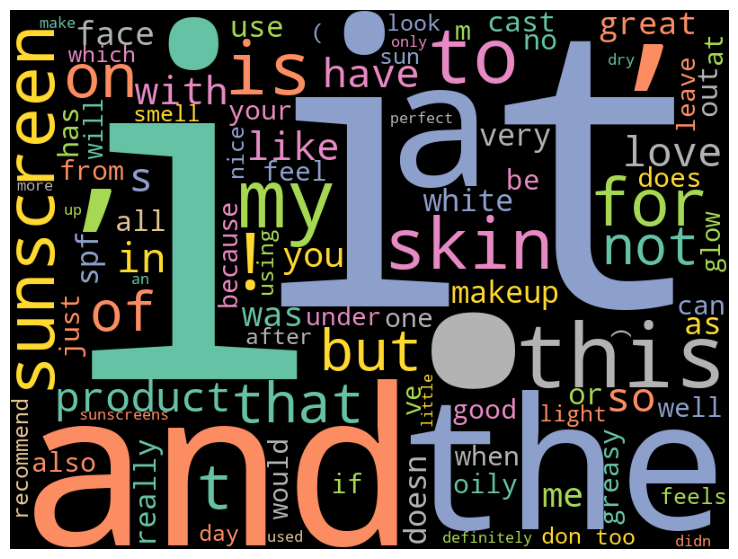

In [40]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(10, 7))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
    
wordcloud = WordCloud(width=800, height=600, colormap='Set2',
                      collocations=False, max_words=100)
wordcloud.generate_from_frequencies(frequencies=all_words_frequency)

# Plot
plot_cloud(wordcloud)

### d. Perform Text Preprocessing
- Removing punctuation, numbers, stopwords.
- Apply stemming and lemmatizing.

In [42]:
# Import libraries
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from gensim.parsing.porter import PorterStemmer
import re
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

# Initialize the stemmer, lemmatizer, and stopwords
porter_stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stopwords_english = set(stopwords.words('english'))

# Add domain-specific stopwords to list
common_words = ['sunscreen', 'product', 'us', 'spf', 'realli', 'on', 'also', 'skin']
stopwords_english.update(common_words)

# Function to remove repeated characters
def remove_repeated_characters(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)  # Adjusted to remove characters repeated more than twice

# Clean doc function
def clean(doc):
    all_words_clean = []
    for word in doc:
        # Remove stopwords and numbers
        if word not in stopwords_english:
            # Remove punctuation
            punc_free = ''.join([ch for ch in word if ch not in string.punctuation])
            # Remove numbers
            no_numbers = re.sub(r'\d+', '', punc_free)
            # Remove repeated characters
            no_repeats = remove_repeated_characters(no_numbers)
            if len(no_repeats) >= 3:
                # Lemmatize word to its root form
                lemmatized_word = lemmatizer.lemmatize(no_repeats)
                all_words_clean.append(lemmatized_word)
    return all_words_clean

# Preprocess review text
def preprocess_reviews(review):
    if isinstance(review, list):
        return clean(review)
    else:
        tokens = word_tokenize(review.lower())
        return clean(tokens)

# Use for creating all_words_clean
# 'all_words' is a list of all tokenized words from your dataset
all_words_clean = clean(all_words)

# Print the first 10 cleaned words
print(all_words_clean[:10])

# Apply preprocessing to DataFrame
selected_columns['process_reviews'] = selected_columns['merged_reviews'].apply(preprocess_reviews)

# Check the output of selected_columns.head() after preprocessing
selected_columns.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jieying\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Jieying\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jieying\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jieying\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['fan', 'really', 'weird', 'fan', 'texture', 'formula', 'repurchased', 'leave', 'feeling', 'soft']


C:\Users\Jieying\AppData\Local\Temp\ipykernel_15240\1212669705.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['process_reviews'] = selected_columns['merged_reviews'].apply(preprocess_reviews)


product_id brand_name_review  \
0    P454380        Supergoop!   
1    P454380        Supergoop!   
2    P454380        Supergoop!   
3    P454380        Supergoop!   
4    P454380        Supergoop!   

                                      merged_reviews  loves_count  \
0  Not a fan This sunscreen was really weird on m...       302951   
1   My most repurchased sunscreen. This just leav...       302951   
2  DAILY MUST-HAVE This is my go-to sunscreen. I ...       302951   
3   this sunscreen is really good i would give it...       302951   
4  Non sticky or white cast/peel off I love this ...       302951   

   limited_edition                                    process_reviews  
0                1        [fan, really, weird, fan, texture, formula]  
1                1  [repurchased, leave, feeling, soft, smooth, si...  
2                1  [daily, musthave, goto, put, every, day, irrit...  
3                1  [really, good, would, give, star, kinda, expen...  
4                1  [non, sticky, white, castpeel, love, sticky, l...

### e. Visualize the Cleaned Word List
- Display cleaned word list using WordCloud.


In [44]:
# Enter your codes here
all_words_frequency = FreqDist(all_words_clean)
print (all_words_frequency)

# print the first 20 most frequently occuring words
print ("\nFirst 20 most frequently occurring words")
print (all_words_frequency.most_common(20))

<FreqDist with 18528 samples and 999904 outcomes>

First 20 most frequently occurring words
[('love', 19788), ('like', 16825), ('face', 12296), ('great', 11858), ('feel', 11473), ('makeup', 10834), ('white', 10183), ('use', 9350), ('really', 9236), ('cast', 8433), ('make', 7720), ('one', 7547), ('smell', 7425), ('oily', 7310), ('day', 7139), ('well', 6927), ('greasy', 6869), ('look', 6831), ('good', 6753), ('would', 6239)]


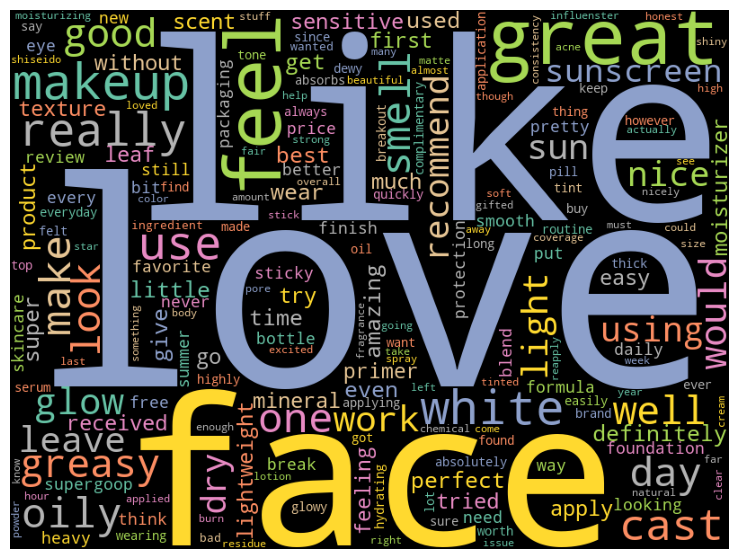

In [45]:
# Plot WordCloud
wordcloud = WordCloud(width=800, height=600, colormap='Set2',
                      collocations=False)
wordcloud.generate_from_frequencies(frequencies=all_words_frequency)

plot_cloud(wordcloud)

## 4. Text Representation

### a. Generate Vector Space Model using TF-IDF
- Convert text data into TF-IDF vectors.

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure the text is formatted as strings
selected_columns['process_reviews'] = selected_columns['process_reviews'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(min_df=1, stop_words='english')

# Apply TF-IDF Vectorizer
dtm = vectorizer.fit_transform(selected_columns['process_reviews'])

# Convert to DataFrame
tfidf_features = pd.DataFrame(dtm.toarray(), index=selected_columns.index, columns=vectorizer.get_feature_names_out())

# Print the number of features and the head of the DataFrame
print(len(vectorizer.get_feature_names_out()))

tfidf_features.head()

C:\Users\Jieying\AppData\Local\Temp\ipykernel_15240\103317656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['process_reviews'] = selected_columns['process_reviews'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


17669


aaf  aap   ab  aback  abandoning  abhor  abide  abided  ability  abit  \
0  0.0  0.0  0.0    0.0         0.0    0.0    0.0     0.0      0.0   0.0   
1  0.0  0.0  0.0    0.0         0.0    0.0    0.0     0.0      0.0   0.0   
2  0.0  0.0  0.0    0.0         0.0    0.0    0.0     0.0      0.0   0.0   
3  0.0  0.0  0.0    0.0         0.0    0.0    0.0     0.0      0.0   0.0   
4  0.0  0.0  0.0    0.0         0.0    0.0    0.0     0.0      0.0   0.0   

   able  ablity  abnormally  aboard  aborbs  abosrbs  abouty  abrand  \
0   0.0     0.0         0.0     0.0     0.0      0.0     0.0     0.0   
1   0.0     0.0         0.0     0.0     0.0      0.0     0.0     0.0   
2   0.0     0.0         0.0     0.0     0.0      0.0     0.0     0.0   
3   0.0     0.0         0.0     0.0     0.0      0.0     0.0     0.0   
4   0.0     0.0         0.0     0.0     0.0      0.0     0.0     0.0   

   abrasive  abreak  abroad  absconded  absence  absobrs  absobs  absolute  \
0       0.0     0.0     0.0        0.0      0.0      0.0     0.0       0.0   
1       0.0     0.0     0.0        0.0      0.0      0.0     0.0       0.0   
2       0.0     0.0     0.0        0.0      0.0      0.0     0.0       0.0   
3       0.0     0.0     0.0        0.0      0.0      0.0     0.0       0.0   
4       0.0     0.0     0.0        0.0      0.0      0.0     0.0       0.0   

   absolutedeal  absolutelly  absolutelt  absolutely  absolutelyamazing  \
0           0.0          0.0         0.0         0.0                0.0   
1           0.0          0.0         0.0         0.0                0.0   
2           0.0          0.0         0.0         0.0                0.0   
3           0.0          0.0         0.0         0.0                0.0   
4           0.0          0.0         0.0         0.0                0.0   

   absolutelyhas  absolutley  absolutly  absorb  absorbable  absorbance  \
0            0.0         0.0        0.0     0.0         0.0         0.0   
1            0.0         0.0        0.0     0.0         0.0         0.0   
2            0.0         0.0        0.0     0.0         0.0         0.0   
3            0.0         0.0        0.0     0.0         0.0         0.0   
4            0.0         0.0        0.0     0.0         0.0         0.0   

   absorbancy  absorbas  absorbdisperse  absorbdry  absorbe  absorbed  \
0         0.0       0.0             0.0        0.0      0.0       0.0   
1         0.0       0.0             0.0        0.0      0.0       0.0   
2         0.0       0.0             0.0        0.0      0.0       0.0   
3         0.0       0.0             0.0        0.0      0.0       0.0   
4         0.0       0.0             0.0        0.0      0.0       0.0   

   absorbedthis  absorbency  absorbent  absorbes  absorbing  \
0           0.0         0.0        0.0       0.0        0.0   
1           0.0         0.0        0.0       0.0        0.0   
2           0.0         0.0        0.0       0.0        0.0   
3           0.0         0.0        0.0       0.0        0.0   
4           0.0         0.0        0.0       0.0        0.0   

   absorbingsettling  absorbs  absorbsblends  absorbsprimes  absorbtion  \
0                0.0      0.0            0.0            0.0         0.0   
1                0.0      0.0            0.0            0.0         0.0   
2                0.0      0.0            0.0            0.0         0.0   
3                0.0      0.0            0.0            0.0         0.0   
4                0.0      0.0            0.0            0.0         0.0   

   absord  absored  absorns  absorption  absorves  absurd  absurdlyexpensive  \
0     0.0      0.0      0.0         0.0       0.0     0.0                0.0   
1     0.0      0.0      0.0         0.0       0.0     0.0                0.0   
2     0.0      0.0      0.0         0.0       0.0     0.0                0.0   
3     0.0      0.0      0.0         0.0       0.0     0.0                0.0   
4     0.0      0.0      0.0         0.0       0.0     0.0                

### b. Singular Value Decomposition (SVD)
- Apply SVD to reduce dimensionality.

In [50]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer

# Compress large dataset from 2000 col to 2 col only.
lsa = TruncatedSVD(2, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(dtm) #pass in dataframe
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [51]:
pd.DataFrame(lsa.components_,index = ["component_1","component_2"],
             columns = vectorizer.get_feature_names_out())

aaf       aap        ab     aback  abandoning     abhor  \
component_1  0.000037  0.000028  0.000472  0.000152    0.000032  0.000028   
component_2  0.000157 -0.000104  0.000234 -0.000062   -0.000009 -0.000002   

                abide    abided   ability      abit      able    ablity  \
component_1  0.000019  0.000032  0.000952  0.000041  0.013953  0.000031   
component_2 -0.000005  0.000044  0.000293  0.000051  0.002157  0.000029   

             abnormally    aboard    aborbs   abosrbs    abouty    abrand  \
component_1    0.000095  0.000088  0.000063  0.000096  0.000031  0.000028   
component_2    0.000175  0.000031 -0.000168 -0.000132 -0.000010 -0.000061   

             abrasive    abreak    abroad  absconded   absence   absobrs  \
component_1  0.000194  0.000047  0.000140   0.000013  0.000020  0.000076   
component_2 -0.000110  0.000130  0.000212   0.000004 -0.000017  0.000002   

               absobs  absolute  absolutedeal  absolutelly  absolutelt  \
component_1  0.000036  0.007134      0.000012     0.000027    0.000037   
component_2 -0.000092 -0.001095      0.000017    -0.000014    0.000009   

             absolutely  absolutelyamazing  absolutelyhas  absolutley  \
component_1    0.050854           0.000031       0.000043    0.000308   
component_2    0.059375          -0.000004      -0.000053   -0.000101   

             absolutly    absorb  absorbable  absorbance  absorbancy  \
component_1   0.000039  0.013631    0.000041    0.000068    0.000045   
component_2   0.000170 -0.012067   -0.000030    0.000189   -0.000017   

             absorbas  absorbdisperse  absorbdry   absorbe  absorbed  \
component_1  0.000101        0.000032   0.000080  0.000310  0.017145   
component_2 -0.000045       -0.000188  -0.000286  0.000518 -0.012394   

             absorbedthis  absorbency  absorbent  absorbes  absorbing  \
component_1      0.000045    0.000070   0.000515  0.000371   0.003854   
component_2     -0.000102    0.000028  -0.000143  0.000494  -0.000757   

             absorbingsettling   absorbs  absorbsblends  absorbsprimes  \
component_1           0.000027  0.047007       0.000037       0.000055   
component_2          -0.000014 -0.019181      -0.000047       0.000135   

             absorbtion    absord   absored   absorns  absorption  absorves  \
component_1    0.000025  0.000054  0.000042  0.000076    0.001595  0.000364   
component_2    0.000054 -0.000189  0.000176  0.000313    0.000287 -0.000490   

               absurd  absurdlyexpensive       abt  abundance  abundantly  \
component_1  0.000098           0.000043  0.000173   0.000021    0.000041   
component_2  0.000037           0.000090 -0.000436  -0.000002    0.000134   

               abused      abut   abysmal   acabado  accelerated  accelerates  \
component_1  0.000064  0.000031  0.000044  0.000002     0.000065     0.000023   
component_2 -0.000097  0.000040 -0.000121  0.000003     0.000013     0.000007   

             accentuate  accentuated  accentuates  accentuating    accept  \
component_1    0.000611     0.000372     0.000505      0.000085  0.000311   
component_2    0.001011    -0.000694     0.000285      0.000004 -0.000462   

             acceptable  acceptably  accepted  acception   accepts    access  \
component_1    0.000197    0.000046  0.000072   0.000027  0.000041  0.000350   
component_2   -0.000202   -0.000211 -0.000076   0.000034  0.000114  0.000205   

             accessible  accessory  accident  accidental  accidentally  \
component_1    0.000428   0.000175  0.000591    0.000095      0.001616   
component_2   -0.000234  -0.000035  0.000194    0.000044      0.000200   

             accidentallyspill  accidently  acclaimed  accommodates  \
component_1           0.000031    0.000025   0.000029      0.000046   
component_2           0.000020   -0.000006  -0.000022     -0.000029   

             accommodating  accompanied  accompanies  accompany  accompanying  \
component_1       0.000038     0.000029     0.000051   0.000024      0.000

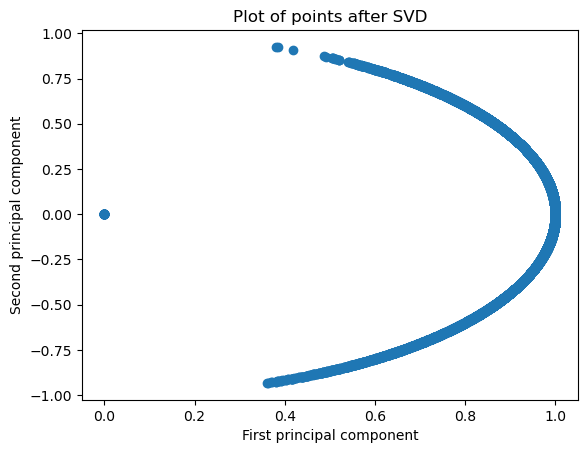

In [52]:
# Plot scatter plot of points
xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]
xs, ys

plt.figure()
plt.scatter(xs,ys)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of points after SVD')
plt.show()

# the doc are very similar

### c. Train a Word2Vec
- Train Word2Vec model on text data.

In [54]:
# Train a Word2Vec and find the words similar to sunscreen
import gensim
from gensim.models import Word2Vec

# Ensure that the text are tokenized
selected_columns['process_reviews'] = selected_columns['process_reviews'].apply(lambda x: x.split())

# Train the Word2Vec model
model = Word2Vec(selected_columns['process_reviews'], min_count=1, vector_size=100, window=5)

# Check if the word "great" is in the vocabulary
w1 = "great"
if w1 in model.wv.key_to_index:
    print(model.wv.most_similar(positive=w1))
else:
    print(f"'{w1}' not found in the vocabulary.")


C:\Users\Jieying\AppData\Local\Temp\ipykernel_15240\1750306597.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['process_reviews'] = selected_columns['process_reviews'].apply(lambda x: x.split())


[('good', 0.7699893116950989), ('wonderful', 0.7361263632774353), ('awesome', 0.7198815941810608), ('perfect', 0.7070995569229126), ('amazing', 0.7053484916687012), ('nice', 0.7048776149749756), ('excellent', 0.6491661071777344), ('well', 0.6282508969306946), ('fantastic', 0.607035219669342), ('love', 0.5882290601730347)]


## 5. Sentiment Analysis
- Perform sentiment analysis to classify review sentiment


Use the compound score from the VADER sentiment analysis. The normalized score ranges from -1 to 1, where:
- A score between -1 and -0.05 can be considered negative.
- A score between -0.05 and 0.05 can be considered neutral.
- A score between 0.05 and 1 can be considered positive.

In [57]:
# Install NLTK's Sentiment Intensity Analyzer:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Ensure necessary NLTK data is downloaded
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jieying\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### a. Calculate the Sentiment Score Using VADER

In [59]:
# Calculate the Sentiment Score Using VADER:
sia = SentimentIntensityAnalyzer()

# Function to calculate the compound sentiment score
def calculate_vader_sentiment(review):
    sentiment = sia.polarity_scores(review)
    return sentiment['compound']  # This is the normalized score between -1 and 1

# Option 1: Create a copy of the DataFrame to avoid the warning
selected_columns = selected_columns.copy()
selected_columns['sentiment_score'] = selected_columns['merged_reviews'].apply(calculate_vader_sentiment)

# Option 2: Use .assign() to avoid the warning
# selected_columns = selected_columns.assign(
#    sentiment_score=selected_columns['merged_reviews'].apply(calculate_vader_sentiment)
# )

# Review the dataset with the new sentiment_score column
print(selected_columns[['merged_reviews', 'sentiment_score']].head())


                                      merged_reviews  sentiment_score
0  Not a fan This sunscreen was really weird on m...          -0.6016
1   My most repurchased sunscreen. This just leav...           0.8350
2  DAILY MUST-HAVE This is my go-to sunscreen. I ...           0.3252
3   this sunscreen is really good i would give it...           0.9145
4  Non sticky or white cast/peel off I love this ...           0.7425


### b. Visualisation - Distribution of Sentiment Scores

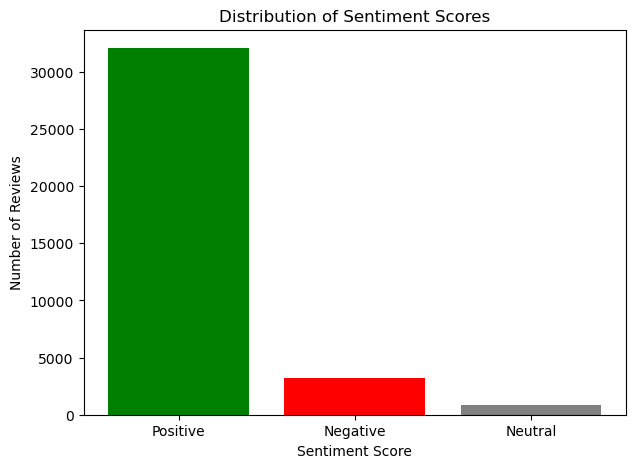

In [61]:
import matplotlib.pyplot as plt

# Plot the distribution of sentiment scores
sentiment_counts = selected_columns['sentiment_score'].value_counts()

# Since sentiment_score is a continuous value, you may want to categorize it:
sentiment_categories = pd.cut(selected_columns['sentiment_score'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])

# Then, count the occurrences of each category
sentiment_category_counts = sentiment_categories.value_counts()

# Plotting a bar chart
plt.figure(figsize=(7, 5))
plt.bar(sentiment_category_counts.index, sentiment_category_counts.values, color=['green', 'red', 'gray'])
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiment Scores')
plt.show()


## 6. Create is_best_seller column

In [63]:
# Using mean
mean_threshold = selected_columns['loves_count'].mean()

# Assign using .loc to avoid the warning
selected_columns.loc[:, 'is_best_seller'] = selected_columns['loves_count'].apply(lambda x: 1 if x > mean_threshold else 0)

# Review the dataset
print(selected_columns[['loves_count', 'is_best_seller']].head())


   loves_count  is_best_seller
0       302951               1
1       302951               1
2       302951               1
3       302951               1
4       302951               1


###  a. Aggregate Data by unique product_id, predict if product is a best-seller or not

In [65]:
# Aggregate data by product_id
aggregated_data = selected_columns.groupby('product_id').agg({
    'loves_count': 'mean',  
    'sentiment_score': 'mean', 
    'limited_edition': 'max' 
}).reset_index()

# Define weights for loves_count and sentiment_score
weight_loves = 0.3  # Reduced weight for loves_count
weight_sentiment = 0.7  # Increased weight for sentiment_score

# Calculate combined score
aggregated_data['combined_score'] = (weight_loves * aggregated_data['loves_count']) + (weight_sentiment * aggregated_data['sentiment_score'])

# Set a threshold based on the top 10% of the combined score
top_percentile = 0.9  # This represents the top 10%
combined_threshold = aggregated_data['combined_score'].quantile(top_percentile)

# Calculate 'is_best_seller' column based on the combined score
aggregated_data['is_best_seller'] = aggregated_data['combined_score'].apply(lambda x: 1 if x > combined_threshold else 0)

# Print result dataset
print(aggregated_data[['product_id', 'loves_count', 'sentiment_score', 'combined_score', 'is_best_seller']].head())


  product_id  loves_count  sentiment_score  combined_score  is_best_seller
0    P196542       7325.0         0.712685     2197.998880               0
1    P232327      16286.0         0.366426     4886.056498               0
2    P311143      27278.0         0.557010     8183.789907               0
3    P394124      20882.0         0.698240     6265.088768               0
4    P395723      12498.0         0.676039     3749.873227               0


## 7. Modeling 

### a. Train-Test Split

In [68]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features and target
X = aggregated_data[['sentiment_score']]  
#X = aggregated_data[['sentiment_score', 'loves_count']]  
y = aggregated_data['is_best_seller'] 

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data (resampling,due to overfitting)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


C:\Users\Jieying\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Jieying\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


In [69]:
# Print the shape of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# If you want to check the shape of the resampled data (after applying SMOTE)
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)


Shape of X_train: (78, 1)
Shape of y_train: (78,)
Shape of X_test: (20, 1)
Shape of y_test: (20,)
Shape of X_train_resampled: (144, 1)
Shape of y_train_resampled: (144,)


In [70]:
# overfitting
print(y_test.value_counts())

is_best_seller
0    16
1     4
Name: count, dtype: int64


### b. Model Training

In [72]:
# Train models on resampled data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the models on the original test set
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Random Forest Accuracy: 0.7
Decision Tree Accuracy: 0.7
Logistic Regression Accuracy: 0.6


### c. Model Evaluation / Comparison - using Classification Report & Confusion Matrix

In [74]:
# Print classification reports and confusion matrices
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nDecision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nLogistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        16
           1       0.38      0.75      0.50         4

    accuracy                           0.70        20
   macro avg       0.65      0.72      0.64        20
weighted avg       0.81      0.70      0.73        20

Confusion Matrix for Random Forest:
[[11  5]
 [ 1  3]]

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        16
           1       0.38      0.75      0.50         4

    accuracy                           0.70        20
   macro avg       0.65      0.72      0.64        20
weighted avg       0.81      0.70      0.73        20

Confusion Matrix for Decision Tree:
[[11  5]
 [ 1  3]]

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.90      0.56      0.69        16
           

### d. Various Visualisation

### Confusion_matrix

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        16
           1       0.38      0.75      0.50         4

    accuracy                           0.70        20
   macro avg       0.65      0.72      0.64        20
weighted avg       0.81      0.70      0.73        20



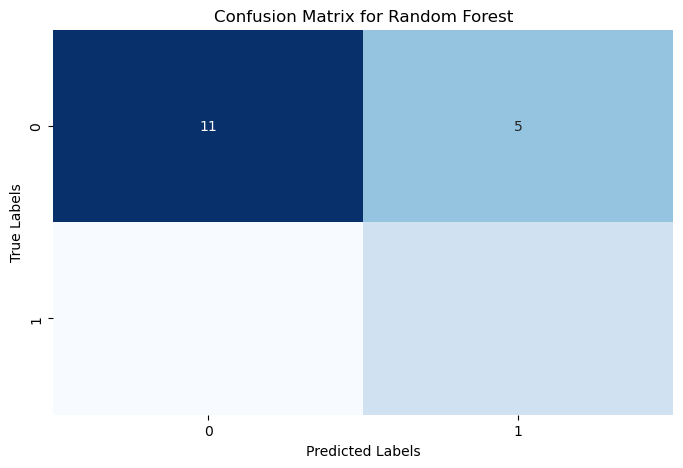


Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        16
           1       0.38      0.75      0.50         4

    accuracy                           0.70        20
   macro avg       0.65      0.72      0.64        20
weighted avg       0.81      0.70      0.73        20



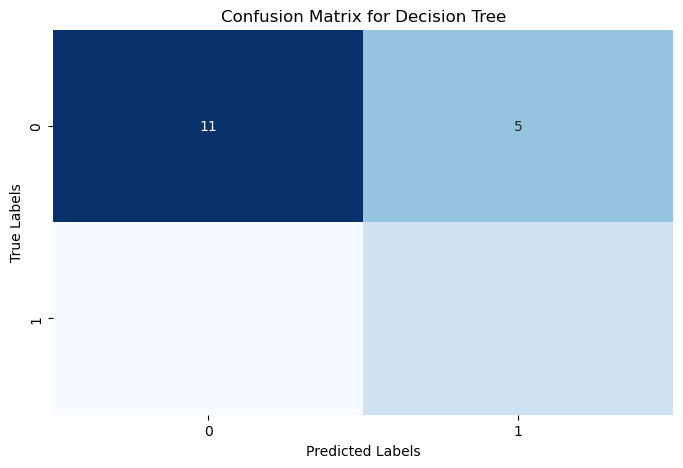


Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.90      0.56      0.69        16
           1       0.30      0.75      0.43         4

    accuracy                           0.60        20
   macro avg       0.60      0.66      0.56        20
weighted avg       0.78      0.60      0.64        20



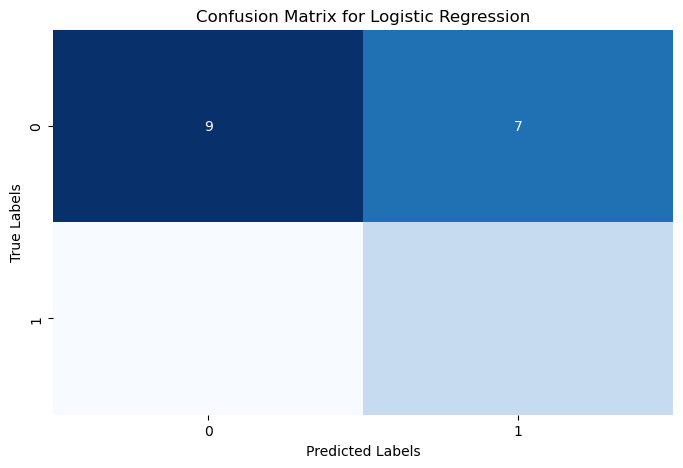

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Function to plot confusion matrix heatmap
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Random Forest
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# Decision Tree
print("\nDecision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

# Logistic Regression
print("\nLogistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")


### Model Performance Comparison

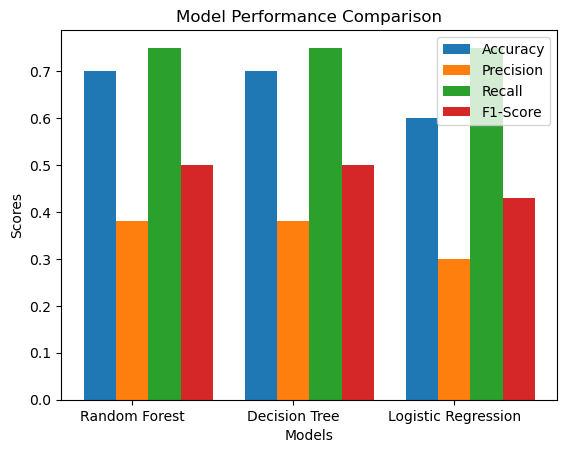

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Example metrics (replace these with your actual metrics)
models = ['Random Forest', 'Decision Tree', 'Logistic Regression']
accuracy = [0.7, 0.7, 0.6]
precision = [0.38, 0.38, 0.30]
recall = [0.75, 0.75, 0.75]
f1_score = [0.50, 0.50, 0.43]

# Plotting the bar chart
x = np.arange(len(models))  # Label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots()
ax.bar(x - width, accuracy, width, label='Accuracy')
ax.bar(x, precision, width, label='Precision')
ax.bar(x + width, recall, width, label='Recall')
ax.bar(x + 2 * width, f1_score, width, label='F1-Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()


### ROC Curve

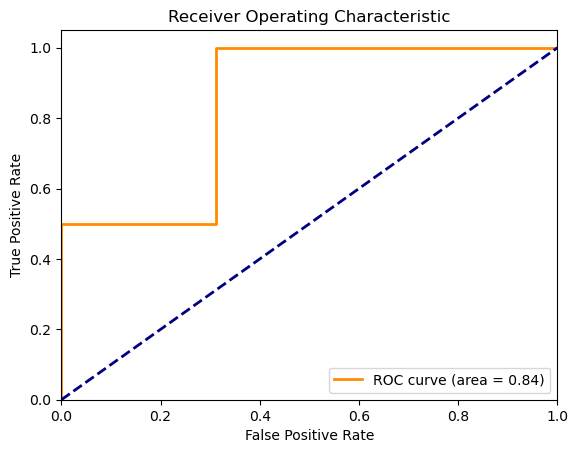

In [81]:
# ROC Curve - models separate the classes (best-seller vs. non-best-seller).
from sklearn.metrics import roc_curve, auc

y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Data Distribution - loves_count, sentiment_score and how they are related to is_best_seller.

C:\Users\Jieying\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jieying\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


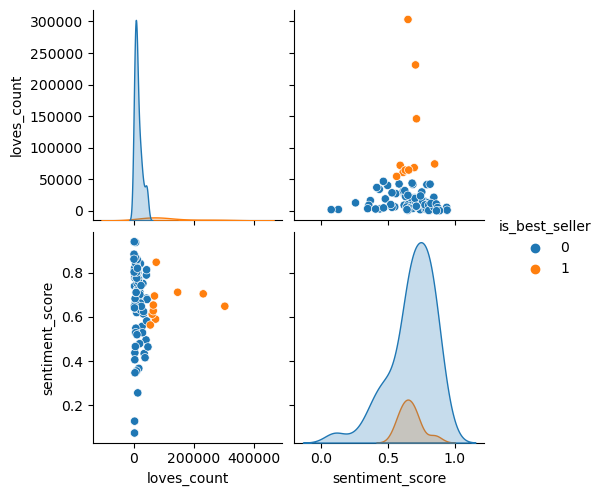

In [83]:
#Data Distribution Visualization - distribution of loves_count, sentiment_score and how they are related to is_best_seller.
sns.pairplot(aggregated_data, hue="is_best_seller", vars=['loves_count', 'sentiment_score'])
plt.show()

### Distribution before/after applying SMOTE

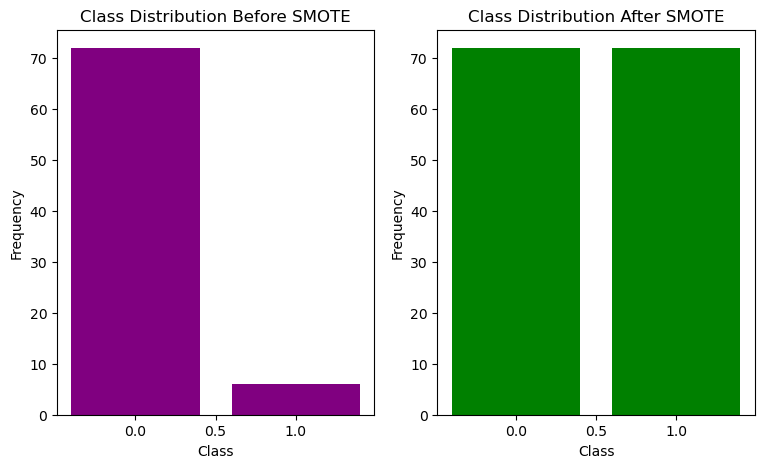

In [85]:
before_smote = y_train.value_counts()
after_smote = y_train_resampled.value_counts()

plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.bar(before_smote.index, before_smote.values, color='purple')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.bar(after_smote.index, after_smote.values, color='green')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.show()


## 8. List of Best Seller Sunscreen Products

In [87]:
# Filter the data to show only the best sellers
best_sellers = aggregated_data[aggregated_data['is_best_seller'] == 1]

# Print the information of best sellers
print(best_sellers)


   product_id  loves_count  sentiment_score  limited_edition  combined_score  \
15    P429242      74272.0         0.847959                0    22282.193571   
18    P429953      72075.0         0.589841                0    21622.912889   
25    P454380     302951.0         0.648322                1    90885.753826   
26    P454383      60887.0         0.611905                0    18266.528334   
33    P456218     231004.0         0.704590                0    69301.693213   
34    P456392     145749.0         0.711808                0    43725.198266   
38    P456410      54584.0         0.563191                0    16375.594234   
44    P467976      68453.0         0.694820                0    20536.386374   
60    P481989      64453.0         0.627504                0    19336.339253   
64    P482320      64624.0         0.653702                0    19387.657592   

    is_best_seller  
15               1  
18               1  
25               1  
26               1  
33            

In [88]:
# Check the distribution of the target variable - this is useful
print(aggregated_data['is_best_seller'].value_counts())

is_best_seller
0    88
1    10
Name: count, dtype: int64
